# Introduction-

#### Buying house in these times is a matter of much importance as any and needs meticulate observation and detailed go through of all the details. But such task can be a lot of work implicit with much technical details,to solve and tackle such situations a house price predictor based on numerous feature can provide an easy leeway to all such problem . buyer can query his requirements in and can get house price corresponding to his required features.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("as2_odin.xlsx")

In [5]:
df.head()

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,NaN,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished


In [6]:
df["no_bedrooms"] = df["no_bedrooms"].str.split().str.get(0)
df.head(3)

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished


In [7]:

df[df["no_bedrooms"].isnull()].index[0]

90

In [8]:

df["no_bathrooms"] = df["no_bathrooms"].str.split().str.get(0)
df.head(3)

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4,2,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4,4,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3,2,2.0,yes,no,no,no,2.0,semi-furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           530 non-null    float64
 1   area              516 non-null    float64
 2   no_bedrooms       531 non-null    object 
 3   no_bathrooms      531 non-null    object 
 4   total_stories     530 non-null    float64
 5   mainroad_loc      530 non-null    object 
 6   guestroom         530 non-null    object 
 7   hotwater          531 non-null    object 
 8   airconditioner    530 non-null    object 
 9   parking           531 non-null    float64
 10  furnishingstatus  530 non-null    object 
dtypes: float64(4), object(7)
memory usage: 45.8+ KB


In [10]:
#rows/datapoints having more than one missing value
x = df.isnull().sum(axis = 1)
v = x[x>1]
v

90     7
121    7
dtype: int64

In [11]:
df.iloc[[90,121]]

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
90,6405000.0,4800.0,NaN,NaN,NaN,NaN,NaN,no,NaN,0.0,NaN
121,5950000.0,6525.0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.iloc[v.index]

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
90,6405000.0,4800.0,NaN,NaN,NaN,NaN,NaN,no,NaN,0.0,NaN
121,5950000.0,6525.0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#feature wise missing values
df.isnull().sum()

h_price              2
area                16
no_bedrooms          1
no_bathrooms         1
total_stories        2
mainroad_loc         2
guestroom            2
hotwater             1
airconditioner       2
parking              1
furnishingstatus     2
dtype: int64

In [14]:
##dropping row 90 and 121
df = df.drop(v.index)

<Axes: xlabel='h_price', ylabel='Density'>

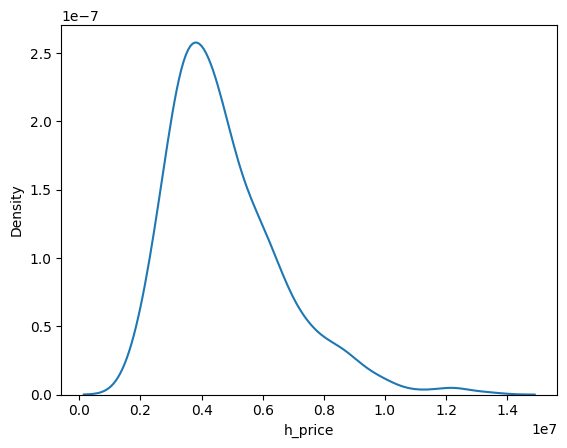

In [15]:
sns.kdeplot(df["h_price"])

<Axes: ylabel='Density'>

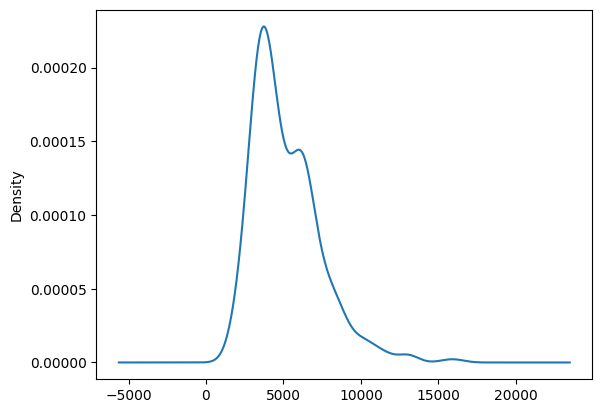

In [16]:
df["area"].plot(kind = "kde")

In [17]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "mean")

In [18]:
df["area"]=si.fit_transform(df[["area"]])

In [19]:
df.isnull().sum()

h_price             2
area                0
no_bedrooms         0
no_bathrooms        0
total_stories       0
mainroad_loc        0
guestroom           0
hotwater            0
airconditioner      0
parking             0
furnishingstatus    0
dtype: int64

In [20]:
small = df[df.h_price.isnull()]

In [21]:
df.drop(small.index,inplace = True)

In [22]:
s1 = df[df.no_bedrooms.isnull()]
df.drop(s1.index,inplace = True)

In [23]:
df.isnull().sum()

h_price             0
area                0
no_bedrooms         0
no_bathrooms        0
total_stories       0
mainroad_loc        0
guestroom           0
hotwater            0
airconditioner      0
parking             0
furnishingstatus    0
dtype: int64

In [24]:
s2 = df[df["guestroom"].isnull()]
df.drop(s2.index,inplace = True)

In [25]:
df.isnull().sum()

h_price             0
area                0
no_bedrooms         0
no_bathrooms        0
total_stories       0
mainroad_loc        0
guestroom           0
hotwater            0
airconditioner      0
parking             0
furnishingstatus    0
dtype: int64

<Axes: xlabel='area', ylabel='h_price'>

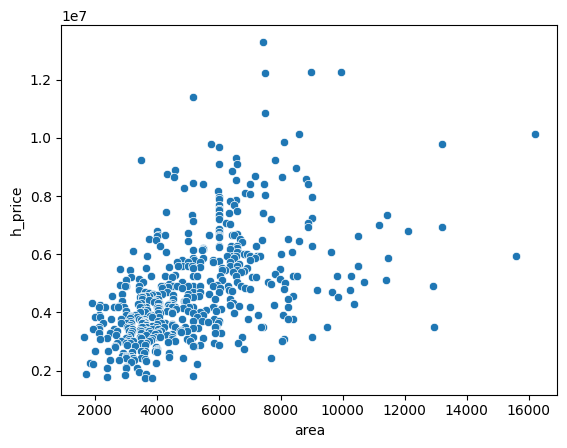

In [26]:
sns.scatterplot(df,x = "area",y = "h_price")

In [27]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,h_price,area,total_stories,parking
h_price,1.000000,0.518319,0.420499,0.386383
area,0.518319,1.000000,0.080595,0.351147
total_stories,0.420499,0.080595,1.000000,0.044135
parking,0.386383,0.351147,0.044135,1.000000


In [28]:
df.head(2)

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4,2,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4,4,4.0,yes,no,no,yes,3.0,furnished


In [29]:
df.furnishingstatus.value_counts()

semi-furnished    223
unfurnished       173
furnished         132
Name: furnishingstatus, dtype: int64

<Axes: xlabel='furnishingstatus', ylabel='h_price'>

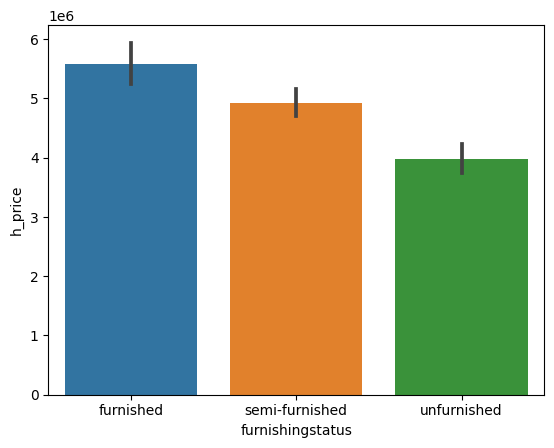

In [30]:
sns.barplot(df,x = "furnishingstatus" ,y = "h_price")

In [31]:
df.parking.value_counts()

0.0    289
1.0    122
2.0    106
3.0     11
Name: parking, dtype: int64

<Axes: xlabel='parking', ylabel='h_price'>

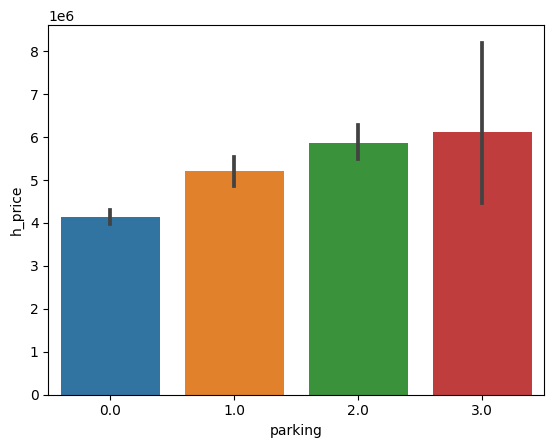

In [32]:
sns.barplot(df,x = "parking" ,y = "h_price")

In [33]:
df.guestroom.value_counts()

no     433
yes     95
Name: guestroom, dtype: int64

<Axes: xlabel='guestroom', ylabel='h_price'>

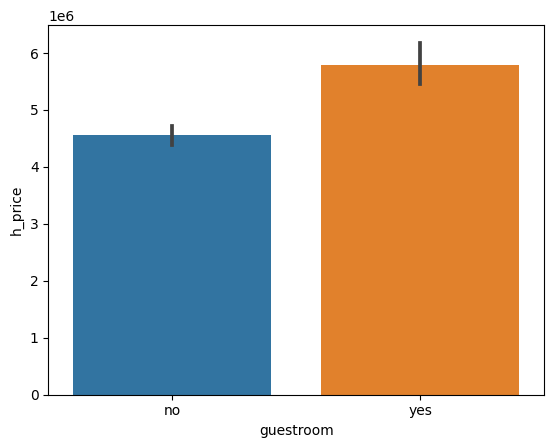

In [34]:
sns.barplot(df,x = "guestroom" ,y = "h_price")

<Axes: xlabel='mainroad_loc', ylabel='h_price'>

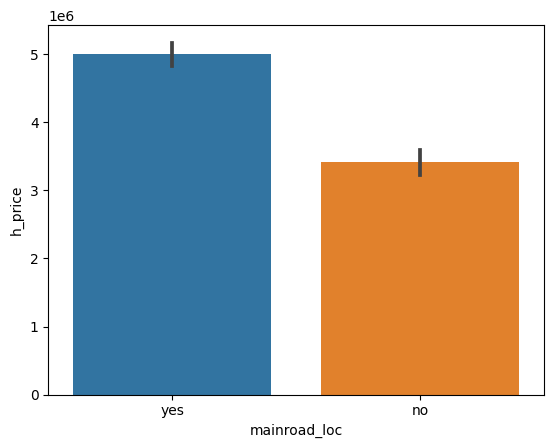

In [35]:
sns.barplot(df,x = "mainroad_loc" ,y = "h_price")

<Axes: xlabel='no_bedrooms', ylabel='h_price'>

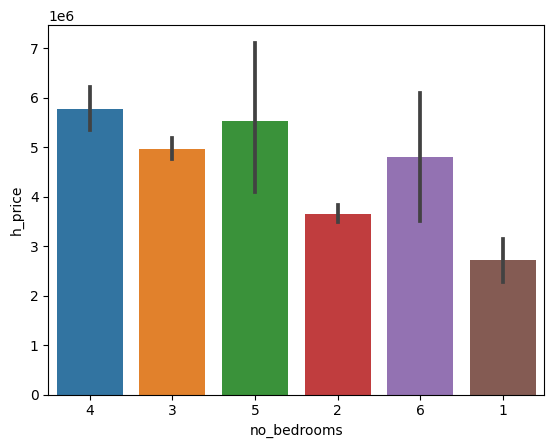

In [36]:
sns.barplot(df,x = "no_bedrooms" ,y = "h_price")

<Axes: xlabel='no_bathrooms', ylabel='h_price'>

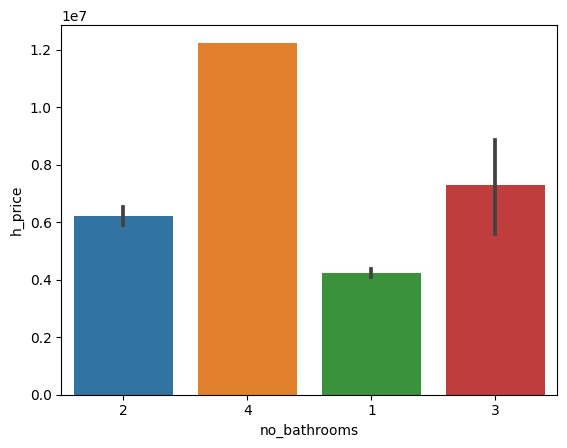

In [37]:
sns.barplot(df,x = "no_bathrooms" ,y = "h_price")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           528 non-null    float64
 1   area              528 non-null    float64
 2   no_bedrooms       528 non-null    object 
 3   no_bathrooms      528 non-null    object 
 4   total_stories     528 non-null    float64
 5   mainroad_loc      528 non-null    object 
 6   guestroom         528 non-null    object 
 7   hotwater          528 non-null    object 
 8   airconditioner    528 non-null    object 
 9   parking           528 non-null    float64
 10  furnishingstatus  528 non-null    object 
dtypes: float64(4), object(7)
memory usage: 49.5+ KB


In [39]:
df["no_bathrooms"]=df["no_bathrooms"].astype("int")
df["no_bedrooms"]=df["no_bedrooms"].astype("int")
df["no_bathrooms"]=df["no_bathrooms"].astype("int")

<ipython-input-40-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

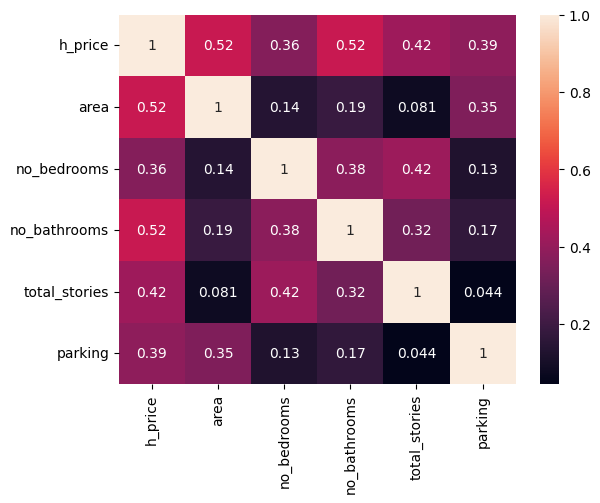

In [40]:
sns.heatmap(df.corr(),annot = True)

## outlier detection

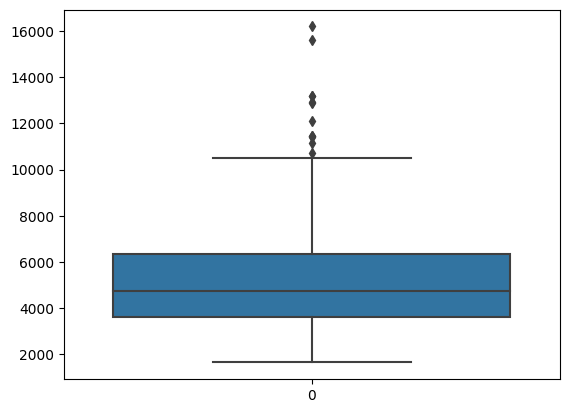

In [41]:
sns.boxplot(df["area"])
df["area"].describe()
iqr = 6360-3600
lb = 3600 - 1.5*(iqr)
ub = 6360 + 1.5*(iqr)

df.drop(df[df["area"]>ub].index,inplace = True)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
col = df.columns
for i in col:
  if df[i].dtype == object:
    df[i]=le.fit_transform(df[i])

In [44]:
df.head()

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.000000,4,2,3.0,1,0,0,1,2.0,0
1,12250000.0,8960.000000,4,4,4.0,1,0,0,1,3.0,0
2,12250000.0,9960.000000,3,2,2.0,1,0,0,0,2.0,1
3,12215000.0,7500.000000,4,2,2.0,1,0,0,1,3.0,0
4,11410000.0,5171.373541,4,1,2.0,1,1,0,1,2.0,0


In [45]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [48]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [49]:
from sklearn.feature_selection import SelectKBest,f_regression

In [50]:
skb = SelectKBest(f_regression,k = 5)
x_train = skb.fit_transform(x_train,y_train)
x_test = skb.transform(x_test)

In [51]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

## Linear Regression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
print("intercept:",lr.intercept_)
print("coeffi:",lr.coef_)


intercept: 4737579.95145631
coeffi: [609784.53234988 569858.34966883 437031.51980532 397158.35306559
 346228.10609129]


In [55]:
print(lr.score(x_train,y_train))

0.6068464473459025


In [56]:
y_pred = lr.predict(x_test)

In [57]:
print(lr.score(x_test,y_test))

0.5005662075856688


In [58]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.5005662075856688


## Ridge

In [59]:
rd = Ridge()

In [60]:
p_grid = {"alpha":[0.005,1,2,0.5,3,5,10,100,1000]}

In [61]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(rd,p_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.005, 1, 2, 0.5, 3, 5, 10, 100, 1000]})

In [62]:
gsv.best_score_

0.5757611267473

In [63]:
print(gsv.best_params_)

{'alpha': 10}


In [64]:
gsv.best_estimator_

Ridge(alpha=10)

In [65]:
rd2 = Ridge(alpha = 100)
rd2.fit(x_train,y_train)

Ridge(alpha=100)

In [66]:
rd2.score(x_train,y_train)

0.5988171114242995

In [67]:
y_pred = rd2.predict(x_test)

In [68]:
print(r2_score(y_test,y_pred))

0.5216914365477021


## Lasso

In [69]:
ls = Lasso()
pr_grid = {"alpha":[0.001, 0.01, 0.1, 1.0, 10.0,100]}
gsv = GridSearchCV(ls,pr_grid,cv = 5,scoring="r2")
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100]},
             scoring='r2')

In [70]:
gsv.best_score_

0.5747352306044744

In [71]:
gsv.best_params_

{'alpha': 100}

In [72]:
ls1 = Lasso(alpha = 10)
ls1.fit(x_train,y_train)

ls1.score(x_train,y_train)


0.6068464472713399

In [73]:
y_pred = ls1.predict(x_test)

In [74]:
r2_score(y_test,y_pred)

0.5005690870798818

## decisiontree regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [76]:
dt = DecisionTreeRegressor()
param = {"max_depth":[3,4,5]}
gsvd = GridSearchCV(dt,param,scoring = "r2",cv = 5)

In [77]:
gsvd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5]}, scoring='r2')

In [78]:
gsvd.best_score_
gsvd.best_params_

{'max_depth': 4}

In [85]:
from sklearn.ensemble import VotingRegressor
vt = VotingRegressor(estimators = [("lr",lr),("rd",rd),("dt",dt)])
vt.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rd', Ridge()),
                            ('dt', DecisionTreeRegressor())])

In [86]:
y_pred = vt.predict(x_test)

In [90]:
print(r2_score(y_test,y_pred))
print(vt.score(x_train,y_train))

0.48471787011954093
0.8126599572288136
